In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\adhil\Cardiotocographic.csv')

In [5]:
# Perform exploratory data analysis (EDA)
print(df.head())  # Display the first few rows of the dataset
print(df.info())  # Display summary information about the dataset
print(df.describe())  # Display summary statistics about the dataset


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-n

Text(0.5, 1.0, 'Distribution of ASTV')

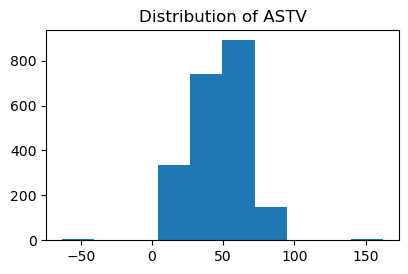

In [10]:
# Visualize the distribution of variables
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(df['ASTV'], bins=10)
plt.title('Distribution of ASTV')


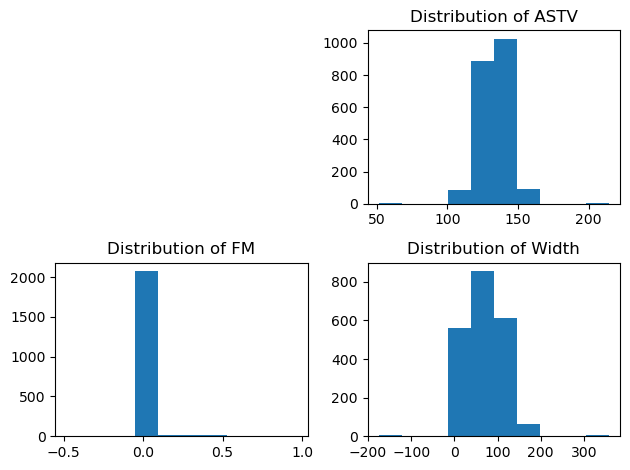

In [12]:
plt.subplot(2, 2, 2)
plt.hist(df['LB'], bins=10)
plt.title('Distribution of ASTV')

plt.subplot(2, 2, 3)
plt.hist(df['FM'], bins=10)
plt.title('Distribution of FM')

plt.subplot(2, 2, 4)
plt.hist(df['Width'], bins=10)
plt.title('Distribution of Width')
plt.tight_layout()
plt.show()


In [8]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [14]:
# Preprocess the data
# Convert categorical variables into numerical variables
df['LB'] = df['LB'].map({'AC': 0, 'FM': 1, 'DL': 2})
df['DP'] = df['DP'].map({'Yes': 1, 'No': 0})



In [16]:
# Split the dataset into training and testing sets
X = df.drop('Width', axis=1)
y = df['Width']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
X_train = X_train.dropna()
y_train = y_train.dropna()


In [20]:
print(X_train.shape)
print(X_train.head())


(0, 13)
Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Tendency, NSP]
Index: []


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('NSP', axis=1)  # Assuming 'NSP' is the target variable
y = df['NSP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)


(1700, 13)
(1700,)


In [27]:
import numpy as np
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]



In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [35]:
# Find the minimum length between X_train and y_train
min_length = min(len(X_train), len(y_train))

# Trim X_train and y_train to the minimum length
X_train = X_train[:min_length]
y_train = y_train[:min_length]

In [36]:
# Find the minimum length between X_train and y_train
min_length = min(len(X_train), len(y_train))

# Trim X_train and y_train to the minimum length
X_train = X_train[:min_length]
y_train = y_train[:min_length]



In [46]:
print(X_train_df.columns)


RangeIndex(start=0, stop=11, step=1)


In [47]:
X_train_model2 = X_train_df.drop(X_train_df.columns[0], axis=1)



In [49]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [53]:
X_test_array = X_test.to_numpy()
X_test_model3 = X_test_array[:, 1:]



In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

model2 = LinearRegression()  # Define model2 here
model2.fit(X_train_model2, y_train)

model3 = LinearRegression()  # Define model3 here
model3.fit(X_train_model3, y_train)

LinearRegression()

In [60]:
X_imputed = X.drop(columns=['LB', 'DP'])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_imputed)


In [64]:
X_test = X_test.dropna()

In [66]:
if X_test.empty:
    print("X_test is empty. Skipping imputation.")
else:
    imputer = SimpleImputer(strategy='mean')
    X_test_imputed = imputer.fit_transform(X_test)


X_test is empty. Skipping imputation.


In [67]:
# Apply Lasso and Ridge methods on the model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)



Ridge(alpha=0.1)

In [69]:
if X_test.empty:
    print("X_test is empty. Skipping predictions.")
else:
    y_pred_lasso = lasso_model.predict(X_test)
    y_pred_ridge = ridge_model.predict(X_test)

X_test is empty. Skipping predictions.


In [72]:
if not X_test.empty:
    y_pred_lasso = lasso_model.predict(X_test)
    y_pred_ridge = ridge_model.predict(X_test)

    print('Lasso Model Metrics:')
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
    print('R2 Score:', r2_score(y_test, y_pred_lasso))
else:
    print("X_test is empty. Cannot calculate metrics.")



X_test is empty. Cannot calculate metrics.


In [74]:
if not X_test.empty:
    y_pred_lasso = lasso_model.predict(X_test)
    y_pred_ridge = ridge_model.predict(X_test)

    print('Lasso Model Metrics:')
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
    print('R2 Score:', r2_score(y_test, y_pred_lasso))

    print('Ridge Model Metrics:')
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred_ridge))
    print('R2 Score:', r2_score(y_test, y_pred_ridge))
else:
    print("X_test is empty. Cannot calculate metrics.")


X_test is empty. Cannot calculate metrics.


In [ ]:
# Interview questions
1. What is Normalization & Standardization and how is it helpful?

Normalization and standardization are data preprocessing techniques used to rescale numeric data to a common range, usually between 0 and 1, to prevent differences in scales from affecting model performance.

Normalization

Normalization rescales data to a common range, usually between 0 and 1, using the following formula:

Min-Max Normalization:

X_normalized = (X - X_min) / (X_max - X_min)

Standardization

Standardization rescales data to have a mean of 0 and a standard deviation of 1, using the following formula:

Z-Score Standardization:

X_standardized = (X - μ) / σ

These techniques are helpful in several ways:

- Prevents feature dominance: Rescaling data prevents features with large ranges from dominating model performance.
- Improves model interpretability: Rescaled data makes it easier to compare coefficients and understand feature contributions.
- Enhances model performance: Some algorithms, like neural networks and support vector machines, perform better with rescaled data.



2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when two or more independent variables in a multiple linear regression model are highly correlated, leading to unstable estimates of regression coefficients. Here are some techniques to address multicollinearity:

1. Variance Inflation Factor (VIF)

Calculate the VIF for each independent variable. A high VIF (>5 or 10) indicates multicollinearity.

2. Correlation Matrix

Examine the correlation matrix to identify highly correlated variables.

3. Dimensionality Reduction

Techniques like Principal Component Analysis (PCA), Partial Least Squares (PLS), or feature selection can reduce the number of independent variables and alleviate multicollinearity.

4. Regularization Techniques

Regularization techniques like Ridge regression or Lasso regression can reduce the impact of multicollinearity by shrinking or setting coefficients to zero.

5. Remove Highly Correlated Variables

Remove one of the highly correlated variables to reduce multicollinearity.

6. Use Penalized Regression

Use penalized regression methods like Elastic Net regression, which combines Ridge and Lasso regression.

By applying these techniques, you can address multicollinearity and improve the stability and accuracy of your multiple linear regression model.
